<a href="https://colab.research.google.com/github/Imran1hp/pandas-/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install plotly matplotlib seaborn --quiet

In [33]:
import pandas as pd
import numpy as np
from  urllib.request import urlretrieve
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [35]:
urlretrieve(medical_charges_url,"medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x7ffa5ee661d0>)

In [36]:
medical_df = pd.read_csv("medical.csv")

In [37]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [41]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [42]:
fig = px.histogram(medical_df,
                   x="age",
                   marginal ='box',
                   nbins=47,
                   title="Age Distribution")
fig.update_layout(bargap=0.1)
fig.show()


In [43]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal =
                   'box',
                   color_discrete_sequence=['red'],
                   title = 'Distribution of BMI')
fig.update_layout(bargap =0.1)
fig.show()

In [44]:
fig = px.histogram(medical_df,
                   x="charges",
                   marginal="box",
                   color='smoker',
                   color_discrete_sequence =["green",'gray'],
                   title ='Annual Medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [45]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [46]:
px.histogram(medical_df , x="smoker",color = 'sex',title = 'smoker')

In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color ='smoker',
                 opacity=0.8,
                 hover_data =['sex','children'],
                 title ='Age vs Charges')
fig.update_traces(marker_size =5)
fig.show()


In [51]:
fig= px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex','children'],
                title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()


In [ ]:
fig= px.histogram(medical_df,
                x='sex',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['children'],
                title='sex vs Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig= px.violin(medical_df,
                x='children',
                y='charges',
                title='children vs Charges')

fig.show()

In [61]:
 medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [62]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [63]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [65]:
smoker_value = {'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_value)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [67]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [87]:
non_smoker_df = medical_df[(medical_df.smoker=='no')]

In [ ]:
non_smoker_df

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

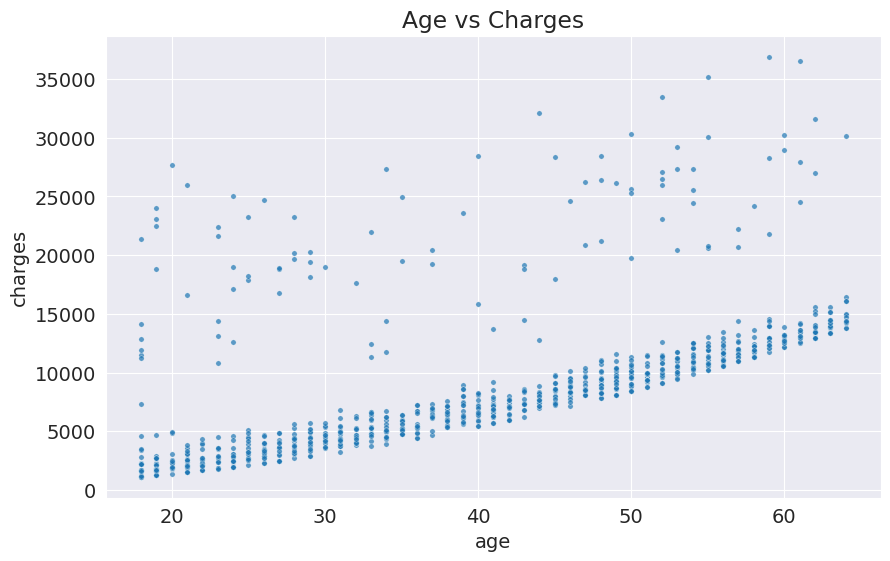

In [89]:
plt.title("Age vs Charges")
sns.scatterplot(data=non_smoker_df,x="age",y="charges",alpha=0.7,s=15)

In [111]:
def estimate_charges(age,w,b):
  return  w * age + b

In [91]:
w=50
b=100

In [92]:
estimate_charges(30,w,b)

1600

In [97]:
ages = non_smoker_df.age


In [ ]:
estimate_charges = estimate_charges(ages,w,b)
estimate_charges

Text(0, 0.5, 'Extimated charges')

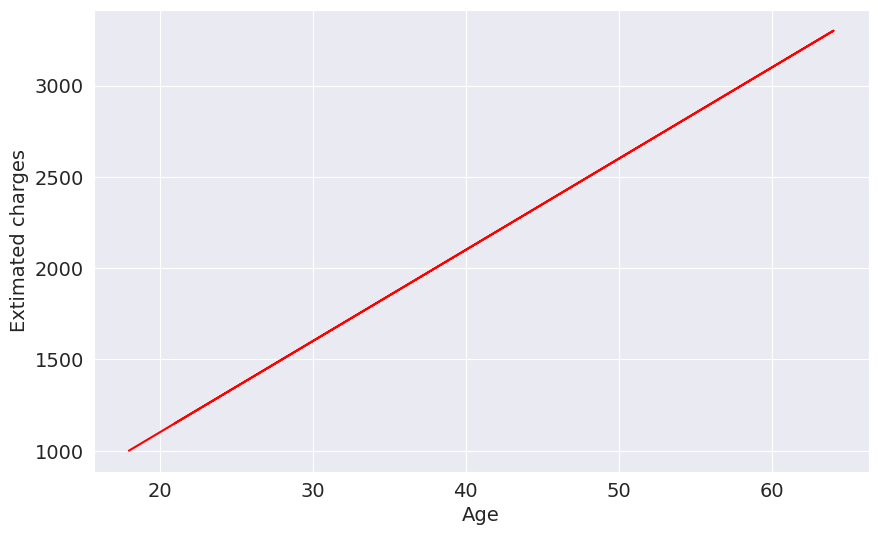

In [105]:
plt.plot(ages,estimate_charges,'r-');
plt.xlabel("Age")
plt.ylabel("Extimated charges")

In [118]:
def  try_parameter(w,b):
  ages = non_smoker_df.age
  target =non_smoker_df.charges
  # Redefine the function locally to avoid the issue
  def estimate_charges_local(age, w, b):
    return w * age + b
  estimated_charges = estimate_charges_local(ages,w,b)
  plt.plot(ages,estimated_charges,'r',alpha=0.9)
  plt.scatter(ages,target,alpha=0.7)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(['estimate','Actual target'])

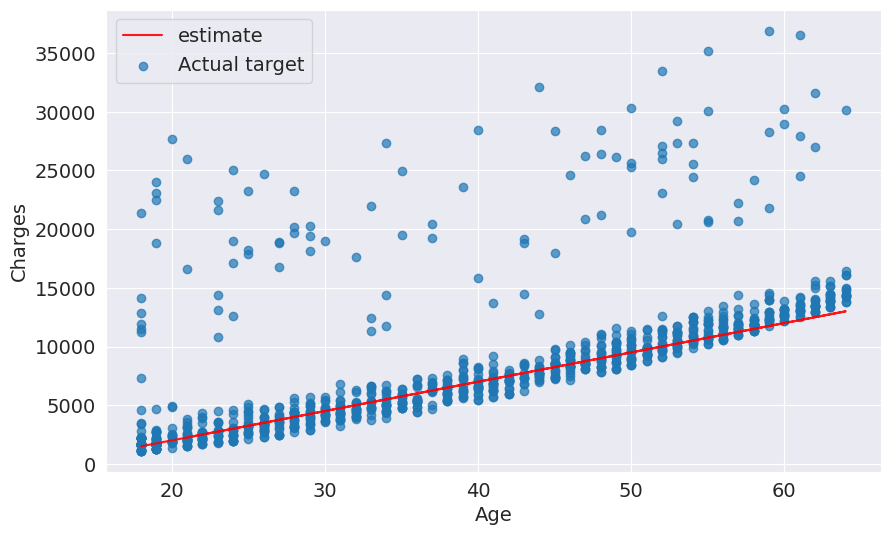

In [141]:
try_parameter(250,-3000)